In [2]:
import tensorflow as tf 
import pandas as pd 
import numpy as np

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import matplotlib.pylab  as plt 
from sklearn import datasets

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [12]:
x_train[59999].shape

(28, 28)

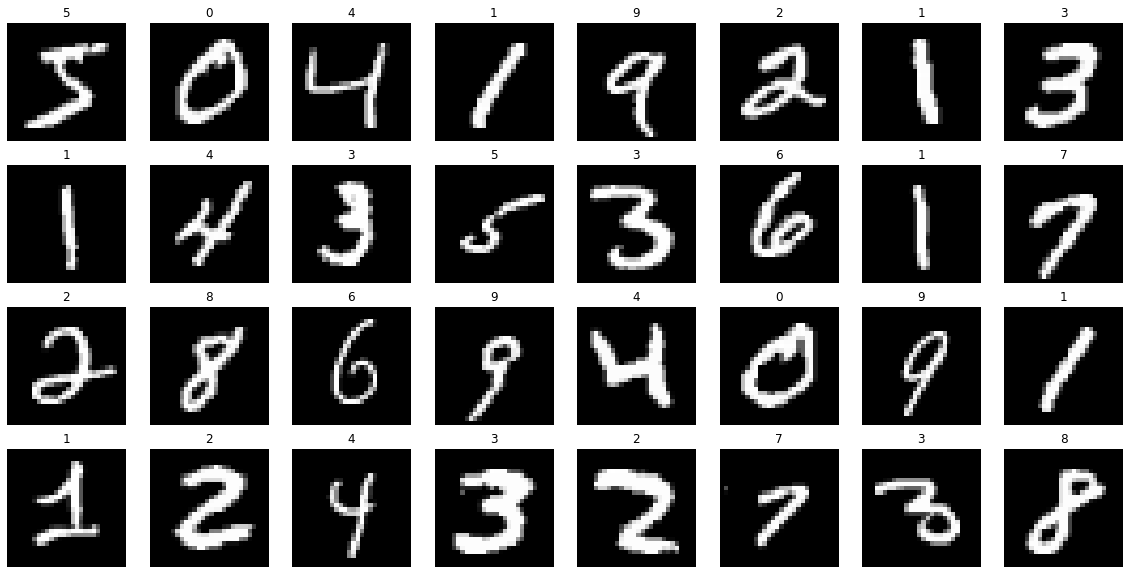

In [28]:
plt.figure(figsize=(20,10))
for i in range(32):
    label = y_train[i]
    plt.subplot(4, 8, 1+i)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(label)
plt.show()

#### 설명 
- flatten = 2차원은 적용이 안되서 1차원으로 처리
- relu = 음수값 증발 
- softmax 전체값을 확률로 변환 

In [33]:
model = tf.keras.models.Sequential([
    # 이미지 전처리를 위한 Convolution 계층이 추가될 것이니 밑에서 보고가세요  
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [34]:
histroy = model.fit(x_train, y_train, epochs=100, )

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 9.6584 - accuracy: 0.8128
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4317 - accuracy: 0.8973
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2930 - accuracy: 0.9255
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2485 - accuracy: 0.9365
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2243 - accuracy: 0.9414
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2168 - accuracy: 0.9448
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1892 - accuracy: 0.9522
Epoch 8/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1842 - accuracy: 0.9532
Epoch 9/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1928 - accuracy: 0.9533
Epoch 10/100
1875/1875 [==============================] - 2s 1ms/step - l

1875/1875 [==============================] - 2s 1ms/step - loss: 0.1004 - accuracy: 0.9794
Epoch 80/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1013 - accuracy: 0.9795
Epoch 81/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1039 - accuracy: 0.9778
Epoch 82/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1018 - accuracy: 0.9795
Epoch 83/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0900 - accuracy: 0.9799
Epoch 84/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0989 - accuracy: 0.9788
Epoch 85/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1014 - accuracy: 0.9791
Epoch 86/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0939 - accuracy: 0.9789
Epoch 87/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1023 - accuracy: 0.9793
Epoch 88/100
1875/1875 [==============================] - 2s 1ms/step - loss:

In [40]:
history_0 = model.fit(x_train, y_train, epochs=100, validation_split=.2, verbose=0)

In [48]:
pd.DataFrame(histroy_0.history)

,loss,accuracy,val_loss,val_accuracy
0,0.077399,0.984208,0.672555,0.969500
1,0.081136,0.984000,0.684142,0.966750
2,0.088297,0.983875,0.732955,0.968500
3,0.078674,0.984021,0.718306,0.969000
4,0.074690,0.984438,0.714265,0.968333
...,...,...,...,...
95,0.063141,0.986146,1.330136,0.968333
96,0.063277,0.986562,1.223942,0.968167
97,0.078991,0.985417,1.283421,0.966250
98,0.069582,0.986375,1.576207,0.966083


In [46]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 4.6085 - accuracy: 0.9534


In [57]:
predictions = model.predict(x_test)

In [58]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [59]:
np.argmax(predictions[0])

7

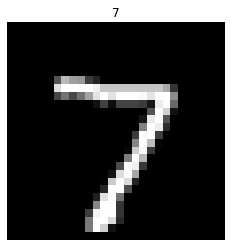

In [61]:
label = y_test[0]
plt.imshow(x_test[0], cmap='gray')
plt.axis('off')
plt.title(label)
plt.show()

# 이미지 전처리
- 합성곱 CNN(Convolution Neural Network)
- 이미지를 전처리하기 위한 방법 
- 보정처리라고 생각 
- CNN은 딥러닝 보다는 영상처리 기법에서 이용하던 기능을 가져온 것 

Convolution Layer + Pooling Layer * ?
- 계층을 쌓을 수 있으면 필터 조정이 가능

In [72]:
x_train_reshape = x_train.reshape((60000, 28,28,1 ))
x_test_reshape = x_test.reshape((10000, 28, 28, 1 ))

In [76]:
model = tf.keras.models.Sequential()                                        #채널개수(흑백1, 컬러3)

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))                                        #채널개수(흑백1, 컬러3)
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))                                        #채널개수(흑백1, 컬러3)
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [77]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 32)               

In [78]:
histroy = model.fit(x_train_reshape, y_train, epochs=100, validation_split=0.2, verbose=0 )

In [84]:
history.history

NameError: name 'history' is not defined

In [85]:
test_loss, test_acc = model.evaluate(x_test_reshape, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2570 - accuracy: 0.9805


In [88]:
predictions = model.predict(x_test_reshape)

In [93]:
predictions[0].argmax()

7